In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# load the dataset
df = pd.read_excel('c:/Users/HP/Downloads/shipment_dataset_10000 (1).xlsx')
df.head()

,order_id,supplier_id,supplier_rating,supplier_lead_time,order_date,promised_delivery_date,actual_delivery_date,shipment_mode,shipping_distance_km,order_quantity,unit_price,total_order_value,weather_condition,region,holiday_period,previous_on_time_rate,carrier_name,delayed_reason_code,on_time_delivery
0,1,5322,3.4,10,2024-05-15,2024-05-25,2024-05-29,Sea,51,48,2153.91,103387.68,Clear,East,No,89.9,EcomExpress,Operational,0
1,2,3932,4.3,10,2024-11-12,2024-11-22,2024-11-27,Sea,373,91,405.36,36887.76,Rainy,East,Yes,93.6,DHL,Customs,0
2,3,8966,3.2,5,2024-08-28,2024-09-02,2024-09-02,Sea,1304,25,3241.41,81035.25,Cloudy,South,No,78.2,BlueDart,NaN,1
3,4,9832,3.9,7,2024-08-12,2024-08-19,2024-08-19,Air,839,71,365.79,25971.09,Rainy,Central,No,85.2,FedEx,Operational,1
4,5,2126,3.2,8,2024-07-07,2024-07-15,2024-07-18,Sea,258,9,3052.84,27475.56,Cloudy,East,No,77.1,BlueDart,Customs,0


In [3]:
# handle missing values
# numeric.columns
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
# categorical.c
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
df.head()

,order_id,supplier_id,supplier_rating,supplier_lead_time,order_date,promised_delivery_date,actual_delivery_date,shipment_mode,shipping_distance_km,order_quantity,unit_price,total_order_value,weather_condition,region,holiday_period,previous_on_time_rate,carrier_name,delayed_reason_code,on_time_delivery
0,1,5322,3.4,10,2024-05-15,2024-05-25,2024-05-29,Sea,51,48,2153.91,103387.68,Clear,East,No,89.9,EcomExpress,Operational,0
1,2,3932,4.3,10,2024-11-12,2024-11-22,2024-11-27,Sea,373,91,405.36,36887.76,Rainy,East,Yes,93.6,DHL,Customs,0
2,3,8966,3.2,5,2024-08-28,2024-09-02,2024-09-02,Sea,1304,25,3241.41,81035.25,Cloudy,South,No,78.2,BlueDart,Operational,1
3,4,9832,3.9,7,2024-08-12,2024-08-19,2024-08-19,Air,839,71,365.79,25971.09,Rainy,Central,No,85.2,FedEx,Operational,1
4,5,2126,3.2,8,2024-07-07,2024-07-15,2024-07-18,Sea,258,9,3052.84,27475.56,Cloudy,East,No,77.1,BlueDart,Customs,0


In [4]:
# feature engineering 
df['delivery_delay_days'] = (
    pd.to_datetime(df['actual_delivery_date']) -
    pd.to_datetime(df['promised_delivery_date'])
).dt.days
df['value_per_quantity'] = df['total_order_value'] / df['order_quantity']
df[['delivery_delay_days', 'value_per_quantity']].head()

,delivery_delay_days,value_per_quantity
0,4,2153.91
1,5,405.36
2,0,3241.41
3,0,365.79
4,3,3052.84


In [5]:
# encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,order_id,supplier_id,supplier_rating,supplier_lead_time,order_date,promised_delivery_date,actual_delivery_date,shipping_distance_km,order_quantity,unit_price,...,region_South,region_West,holiday_period_Yes,carrier_name_DHL,carrier_name_Delhivery,carrier_name_EcomExpress,carrier_name_FedEx,delayed_reason_code_Operational,delayed_reason_code_Traffic,delayed_reason_code_Weather
0,1,5322,3.4,10,2024-05-15,2024-05-25,2024-05-29,51,48,2153.91,...,False,False,False,False,False,True,False,True,False,False
1,2,3932,4.3,10,2024-11-12,2024-11-22,2024-11-27,373,91,405.36,...,False,False,True,True,False,False,False,False,False,False
2,3,8966,3.2,5,2024-08-28,2024-09-02,2024-09-02,1304,25,3241.41,...,True,False,False,False,False,False,False,True,False,False
3,4,9832,3.9,7,2024-08-12,2024-08-19,2024-08-19,839,71,365.79,...,False,False,False,False,False,False,True,True,False,False
4,5,2126,3.2,8,2024-07-07,2024-07-15,2024-07-18,258,9,3052.84,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# normalize numerical features
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
df_encoded.head()

,order_id,supplier_id,supplier_rating,supplier_lead_time,order_date,promised_delivery_date,actual_delivery_date,shipping_distance_km,order_quantity,unit_price,...,region_South,region_West,holiday_period_Yes,carrier_name_DHL,carrier_name_Delhivery,carrier_name_EcomExpress,carrier_name_FedEx,delayed_reason_code_Operational,delayed_reason_code_Traffic,delayed_reason_code_Weather
0,0.0000,0.480276,0.36,1.000,2024-05-15,2024-05-25,2024-05-29,0.027517,0.474747,0.419177,...,False,False,False,False,False,True,False,True,False,False
1,0.0001,0.325814,0.72,1.000,2024-11-12,2024-11-22,2024-11-27,0.243624,0.909091,0.062228,...,False,False,True,True,False,False,False,False,False,False
2,0.0002,0.885209,0.28,0.375,2024-08-28,2024-09-02,2024-09-02,0.868456,0.242424,0.641179,...,True,False,False,False,False,False,False,True,False,False
3,0.0003,0.981442,0.56,0.625,2024-08-12,2024-08-19,2024-08-19,0.556376,0.707071,0.054150,...,False,False,False,False,False,False,True,True,False,False
4,0.0004,0.125125,0.28,0.750,2024-07-07,2024-07-15,2024-07-18,0.166443,0.080808,0.602684,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# train_test_split
X = df_encoded.drop('on_time_delivery', axis=1)
y = df_encoded['on_time_delivery']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(len(X_train))
print(len(X_test))

8000
2000


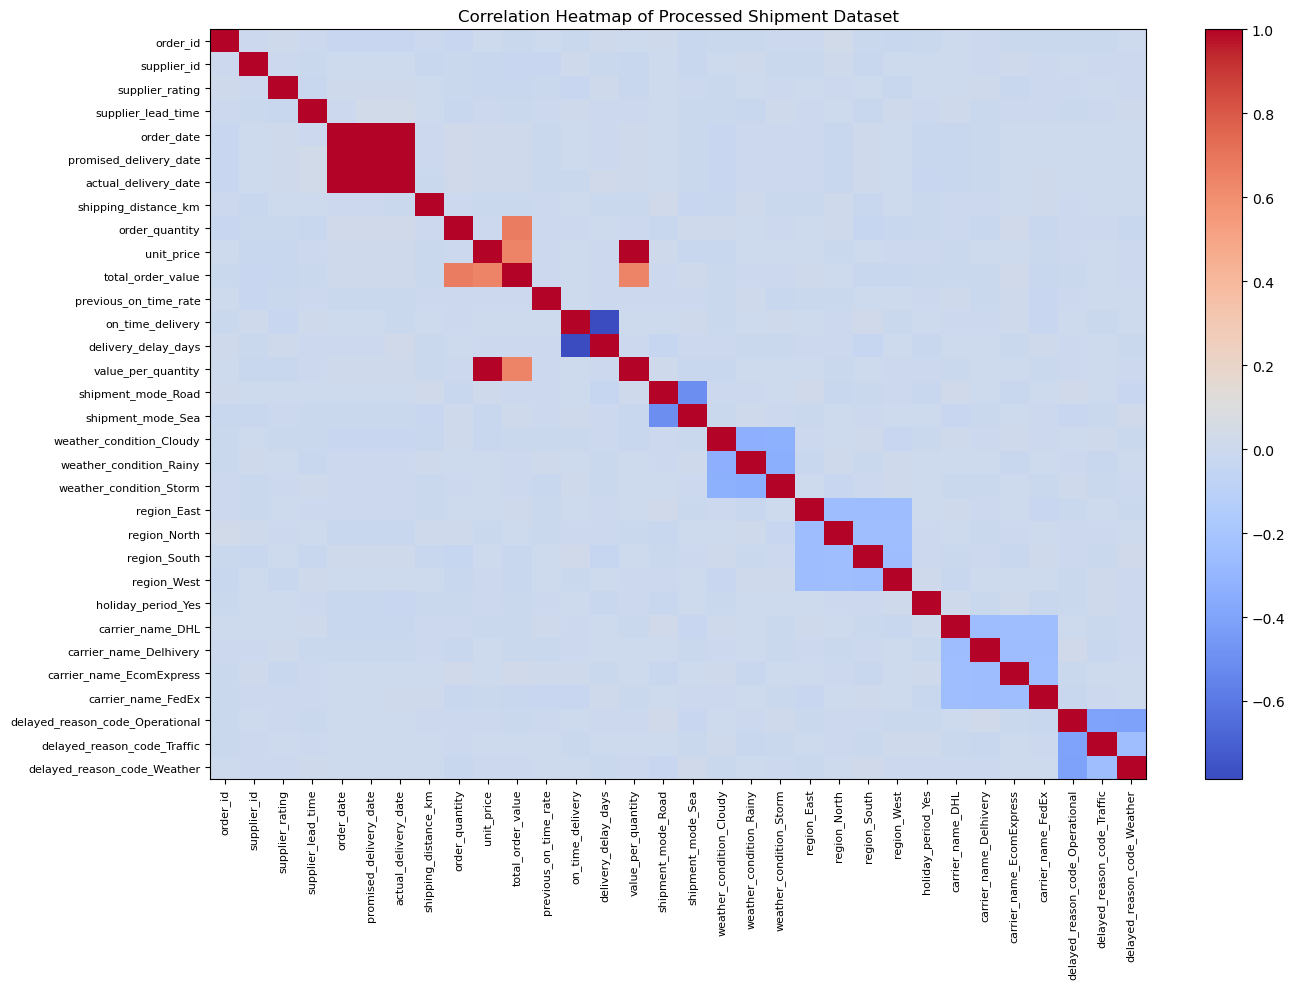

In [8]:
#correlation heatmap
corr = df_encoded.corr()
plt.figure(figsize=(14, 10))
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=8)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8)
plt.colorbar()
plt.title("Correlation Heatmap of Processed Shipment Dataset", fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
df_encoded.to_excel("futurepreprocessed_dataset.xlsx", index=False)